In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the cleaned data
df = pd.read_csv("Nepali_Treking_EnhancedV2.csv")

# Clean 'Cost' column
df["Cost"] = (
    df["Cost"]
    .str.replace(r"\n|\s+", "", regex=True)
    .str.extract(r"(\d+)")
    .astype(float)
)
# Clean 'Time' column
df["Time"] = df["Time"].str.extract(r"(\d+)").astype(float)
# Clean 'Max Altitude' column
df["Max Altitude"] = (
    df["Max Altitude"]
    .str.replace("m", "")
    .str.replace(",", "")
    .str.strip()
    .astype(float)
)
# Standardize 'Date of Travel' column
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], errors="coerce")
# Fill missing values for categorical columns with 'Unknown'
categorical_columns = [
    "Sex",
    "Country",
    "Fitness Level",
    "Weather Conditions",
    "Guide/No Guide",
    "Equipment Used",
    "Purpose of Travel",
    "Health Incidents",
]
df[categorical_columns] = df[categorical_columns].fillna("Unknown")
# Fill missing values for numerical columns with 0
numerical_columns = ["Trekking Group Size", "Review/Satisfaction"]
df[numerical_columns] = df[numerical_columns].fillna(0)
df

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,0,Everest Base Camp Trek,1.0,16.0,Moderate,5545.0,Hotel/Guesthouse,March - May & Sept - Dec,2022-09-13,Non-Binary,...,0,total,Intermediate,Clear,10.0,Guide,Poles,Leisure,Unknown,4.5
1,1,Everest Base Camp Short Trek,1.0,14.0,Moderate,5545.0,Hotel/Guesthouse,March - May & Sept - Dec,2021-09-04,Female,...,40,Afghanistan,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0.0
2,2,Everest Base Camp Heli Shuttle Trek,2000.0,12.0,Moderate,5545.0,Hotel/Guesthouse,March - May & Sept - Dec,2021-01-25,Female,...,80,Albania,Advanced,Snowy,12.0,Guide,Oxygen,Charity,Unknown,5.0
3,3,Everest Base Camp Heli Trek,3.0,11.0,Moderate,5545.0,Hotel/Guesthouse,March - May & Sept - Dec,2022-01-28,Non-Binary,...,120,Algeria,Intermediate,Clear,5.0,Guide,Poles,Leisure,Unknown,4.0
4,4,Everest Base Camp Trek for Seniors,1.0,20.0,Moderate,5545.0,Hotel/Guesthouse,March - May & Sept - Dec,2021-10-21,Non-Binary,...,200,Andra,Beginner,Cloudy,6.0,No Guide,Unknown,Adventure,Minor Injury,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,Ghorepani Poon Hill Trek,450.0,10.0,Easy,3210.0,Hotel/Guesthouse,Jan - May & Sept - Dec,2022-08-09,Male,...,7600,Syria,Intermediate,Clear,5.0,Guide,Poles,Leisure,Unknown,4.0
379,379,Upper Mustang Trek,2100.0,17.0,Moderate-Hard,4200.0,Hotel/Guesthouse,Jan - May & Sept - Dec,2022-09-09,Female,...,7620,Tajikistan,Beginner,Cloudy,6.0,No Guide,Unknown,Adventure,Minor Injury,3.5
380,380,Mardi Himal Trek,590.0,9.0,Easy-Moderate,4500.0,Hotel/Guesthouse,Jan - May & Sept - Dec,2021-05-04,Non-Binary,...,7640,Thailand,Intermediate,Clear,10.0,Guide,Poles,Leisure,Unknown,4.5
381,381,Langtang Valley Trekking,690.0,11.0,Moderate,4773.0,Hotel/Guesthouse,Jan - May & Sept - Dec,2021-01-13,Female,...,7680,Togo,Beginner,Rainy,8.0,No Guide,Unknown,Adventure,Altitude Sickness,3.0


In [27]:
# Exploratory Data Analysis (EDA)

# 1. Overview of dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           383 non-null    int64         
 1   Trek                 383 non-null    object        
 2   Cost                 383 non-null    float64       
 3   Time                 383 non-null    float64       
 4   Trip Grade           383 non-null    object        
 5   Max Altitude         383 non-null    float64       
 6   Accomodation         383 non-null    object        
 7   Best Travel Time     383 non-null    object        
 8   Date of Travel       383 non-null    datetime64[ns]
 9   Sex                  383 non-null    object        
 10  Age                  383 non-null    int64         
 11  Employment Type      383 non-null    object        
 12  GraduateOrNot        383 non-null    object        
 13  AnnualIncome         383 non-null  

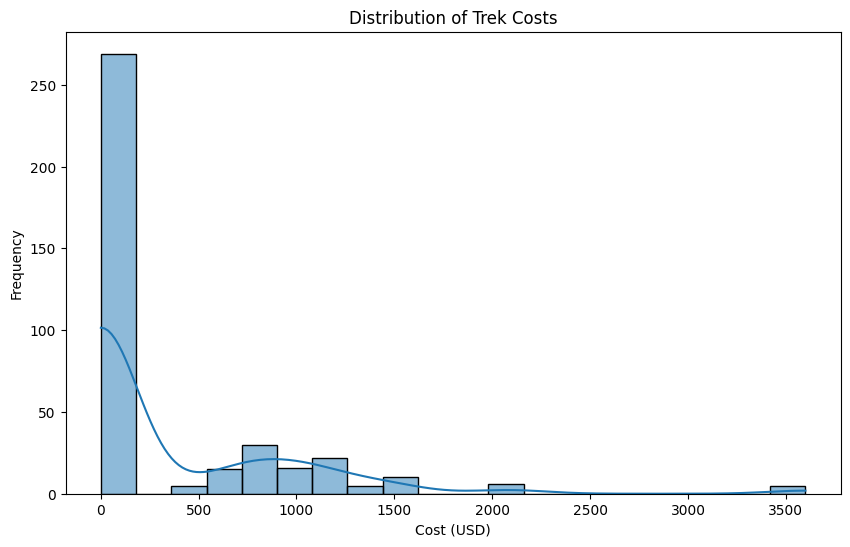

In [28]:

# 2. Distribution of Trek Costs
plt.figure(figsize=(10, 6))
sns.histplot(df['Cost'], bins=20, kde=True)
plt.title('Distribution of Trek Costs')
plt.xlabel('Cost (USD)')
plt.ylabel('Frequency')
plt.show()

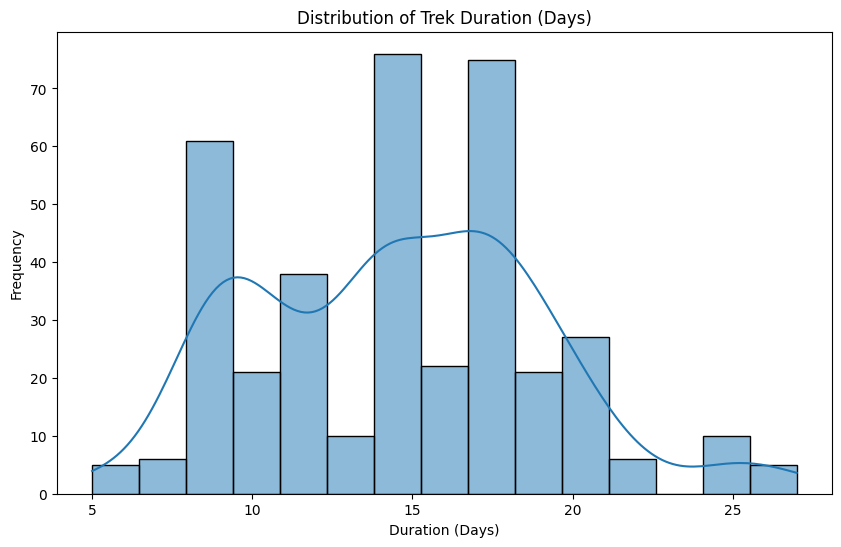

In [29]:
# 3. Distribution of Trek Duration (Time)
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=15, kde=True)
plt.title('Distribution of Trek Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.show()

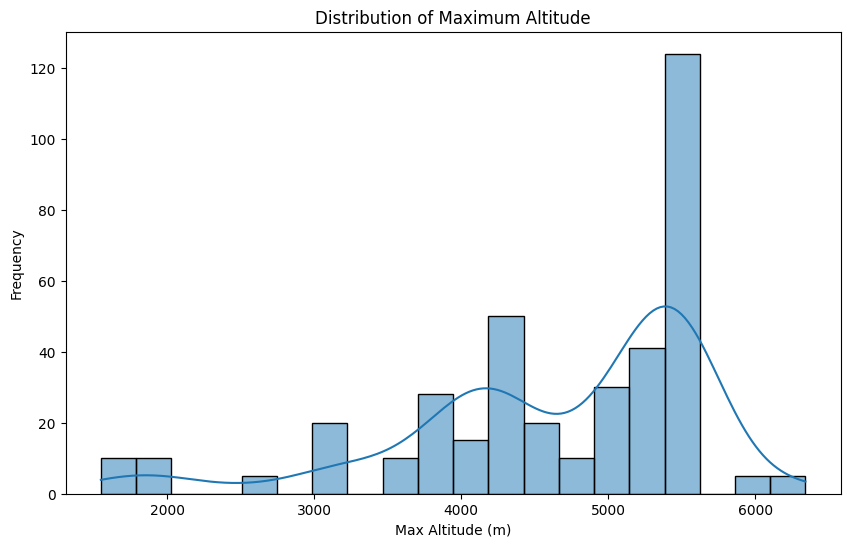

In [30]:
# 4. Maximum Altitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Max Altitude'], bins=20, kde=True)
plt.title('Distribution of Maximum Altitude')
plt.xlabel('Max Altitude (m)')
plt.ylabel('Frequency')
plt.show()

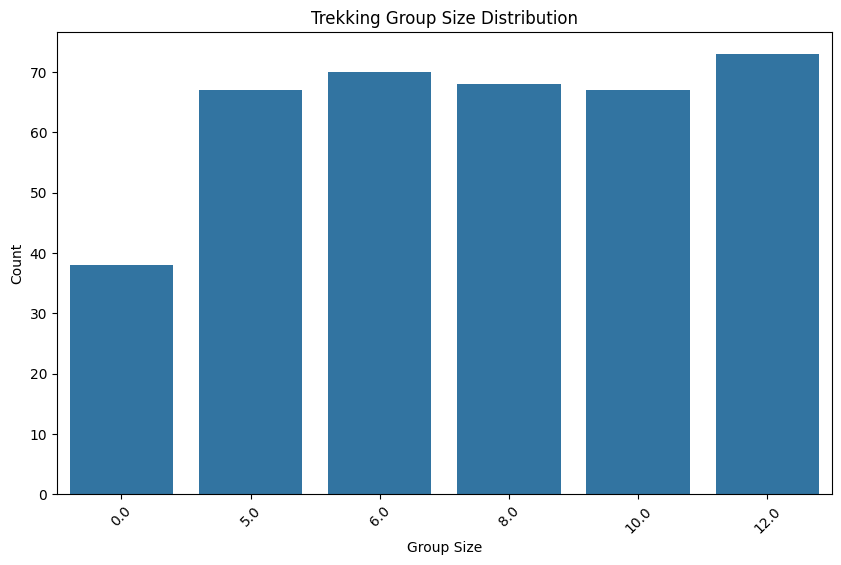

In [31]:
# 5. Trekking Group Size Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Trekking Group Size', data=df)
plt.title('Trekking Group Size Distribution')
plt.xlabel('Group Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

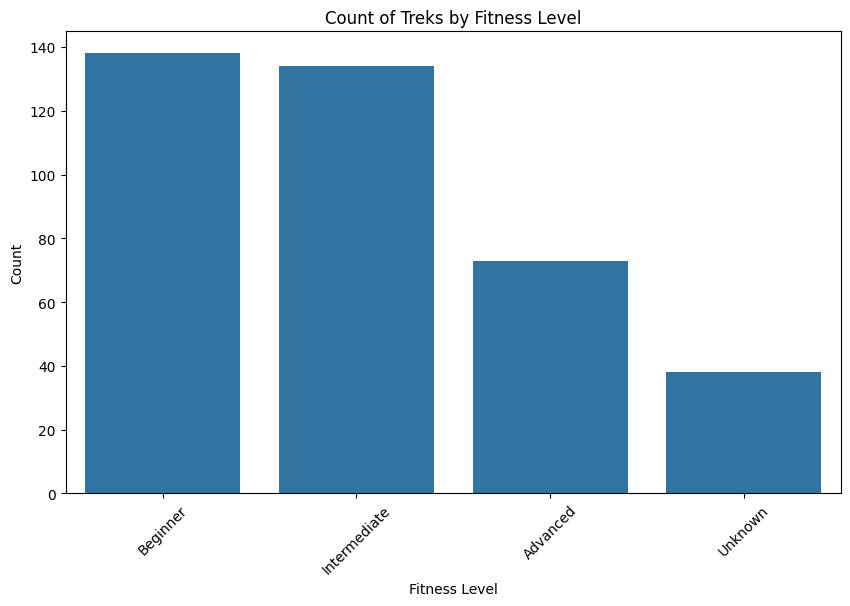

In [32]:

# 6. Count of Treks by Fitness Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Fitness Level', data=df, order=df['Fitness Level'].value_counts().index)
plt.title('Count of Treks by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

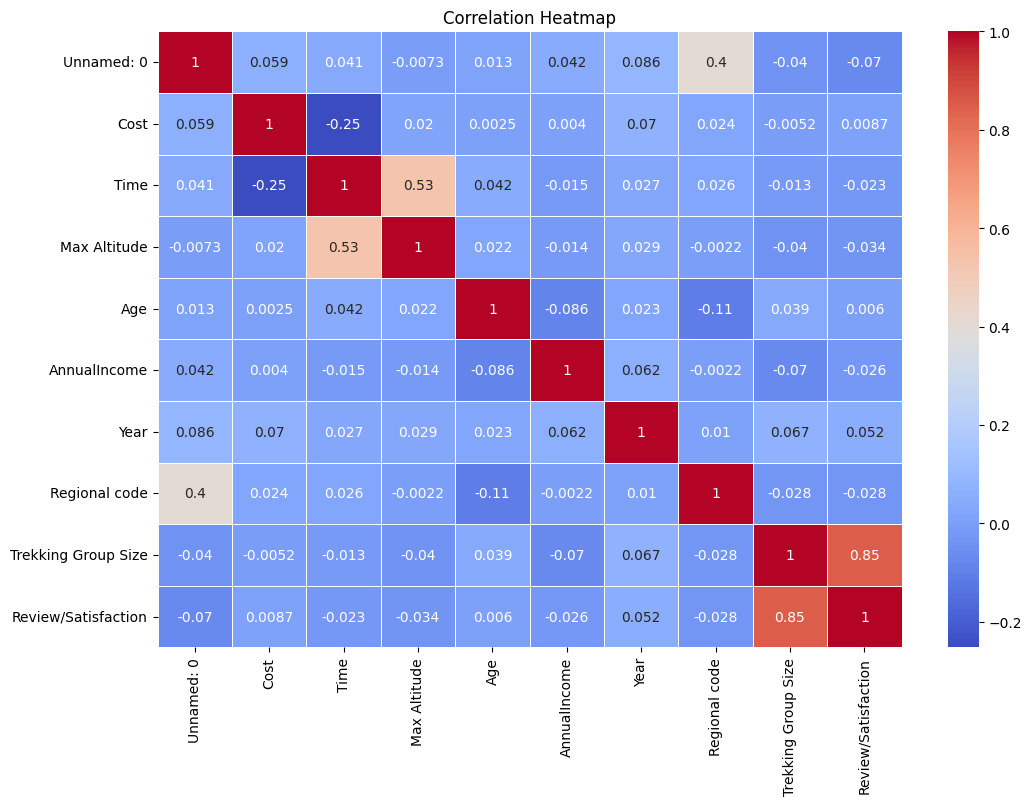

In [33]:
# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=1), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

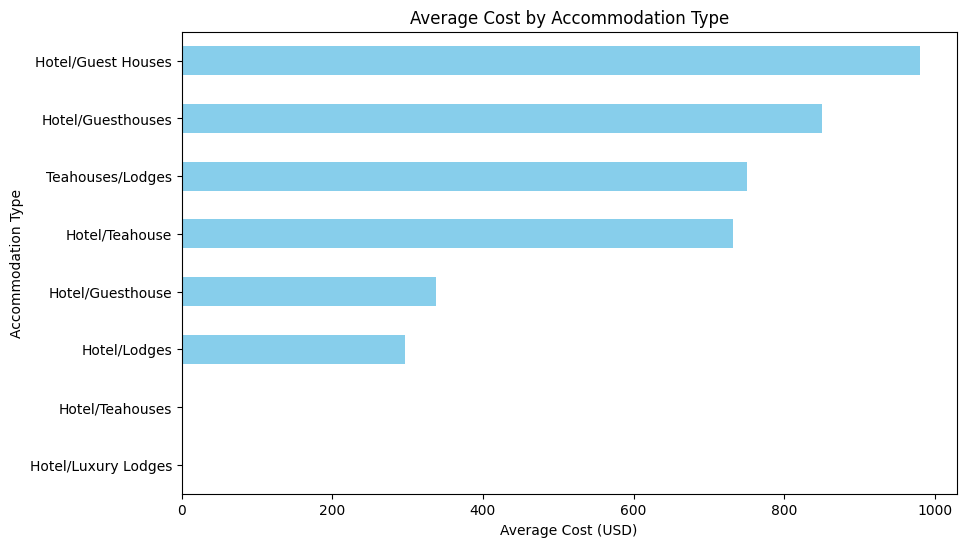

In [34]:
# 8. Average Cost by Accommodation Type
plt.figure(figsize=(10, 6))
avg_cost_accommodation = df.groupby('Accomodation')['Cost'].mean().sort_values()
avg_cost_accommodation.plot(kind='barh', color='skyblue')
plt.title('Average Cost by Accommodation Type')
plt.xlabel('Average Cost (USD)')
plt.ylabel('Accommodation Type')
plt.show()

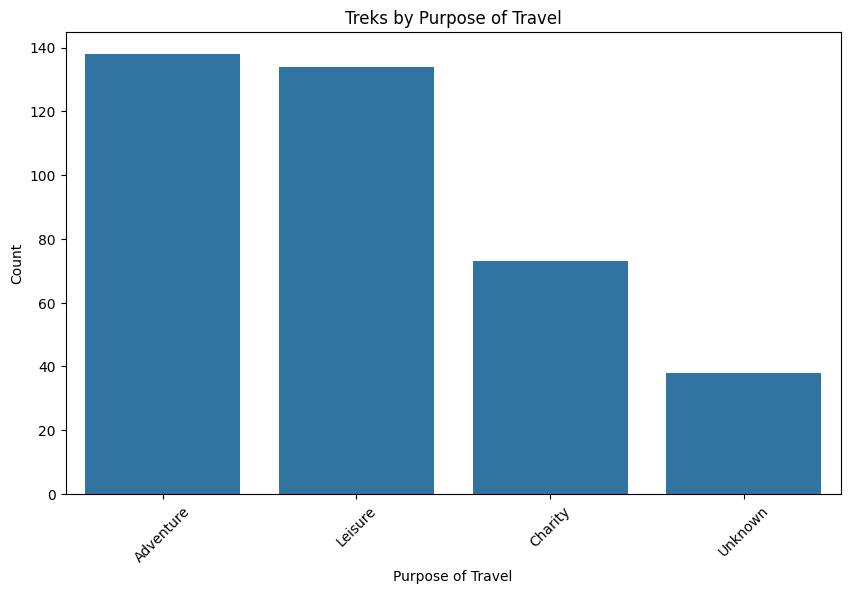

In [35]:
# 9. Treks by Purpose of Travel
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose of Travel', data=df, order=df['Purpose of Travel'].value_counts().index)
plt.title('Treks by Purpose of Travel')
plt.xlabel('Purpose of Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()